In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_Baseline_7.0_cropped.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_OAE_7.0_cropped.nc')

### Data Point Seasonal Average of CO2 flux

In [7]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [8]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [9]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [10]:
data_baseline_plot = sliced_data_baseline.co2flux_cpl.mean(dim=('y', 'x'))
data_oae_plot = sliced_data_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [11]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

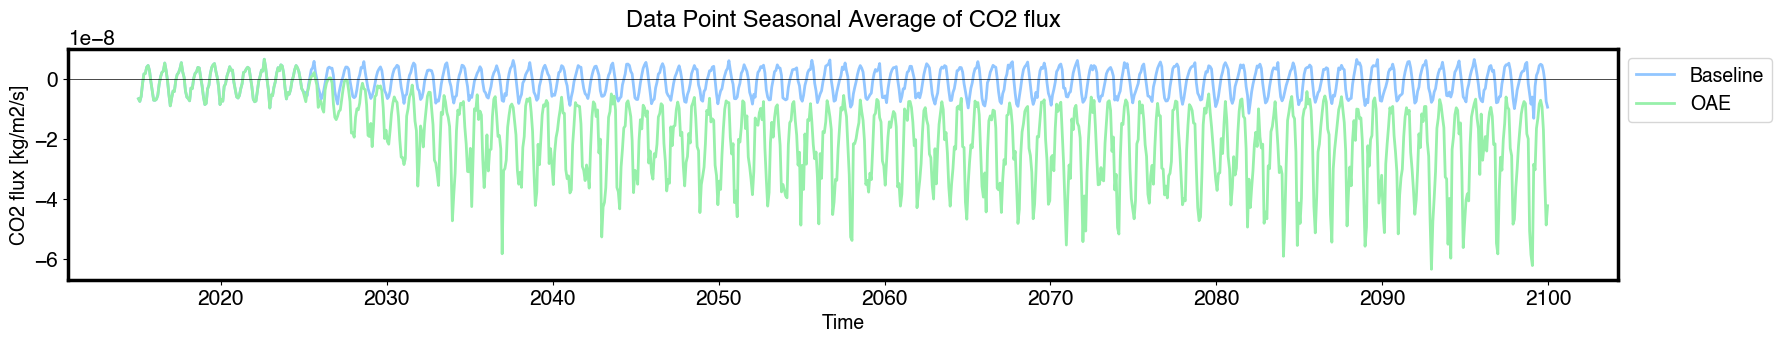

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.co2flux_cpl, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.co2flux_cpl, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 flux [kg/m2/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Seasonal Average of CO2 flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

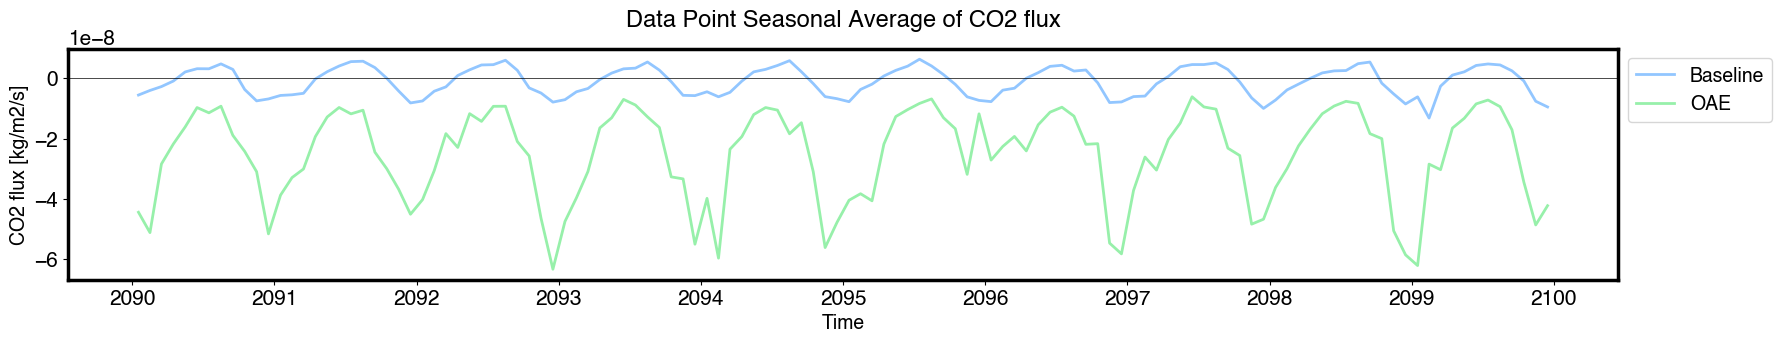

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.co2flux_cpl, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.co2flux_cpl, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 flux [kg/m2/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Seasonal Average of CO2 flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Unweighted Data Point Seasonal Average of CO2 flux

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_baseline = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [17]:
co2flux_season_mean_all_years_baseline = co2flux_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.mean(["y", "x"])

In [18]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_oae = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [19]:
co2flux_season_mean_all_years_oae = co2flux_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.mean(["y", "x"])

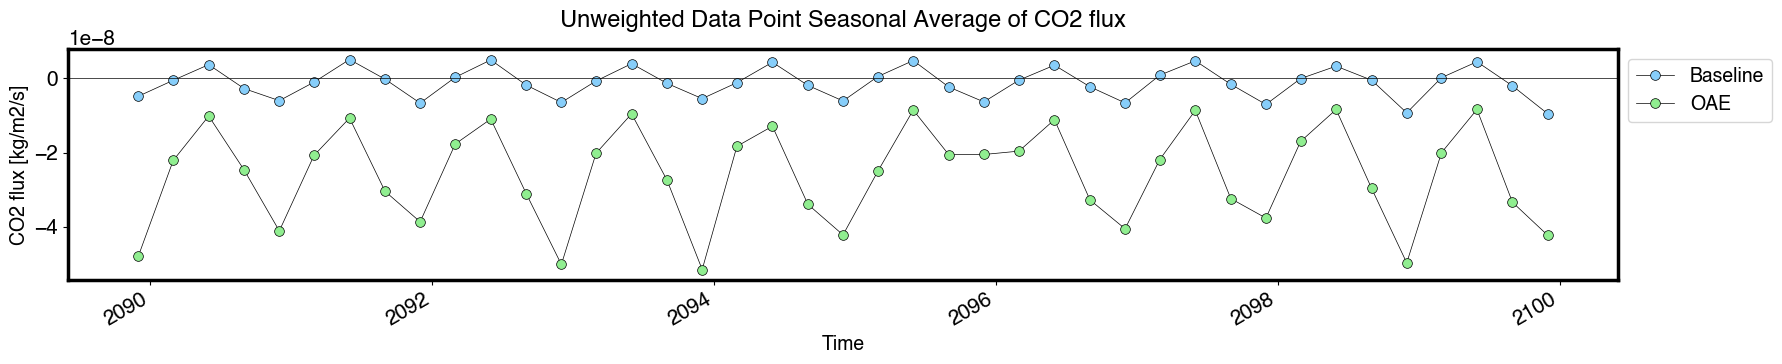

In [20]:
f, ax = plt.subplots(figsize=(20, 3))

co2flux_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of CO2 flux", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 flux [kg/m2/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted Data Point Seasonal Average of CO2 flux

In [21]:
month_length_baseline = co2flux_baseline.time_counter.dt.days_in_month
co2flux_weighted_mean_baseline = ((co2flux_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_baseline = co2flux_weighted_mean_baseline.where(co2flux_weighted_mean_baseline)
co2flux_weighted_season_baseline = co2flux_weighted_mean_baseline.mean(["y", "x"])

In [22]:
month_length_oae = co2flux_oae.time_counter.dt.days_in_month
co2flux_weighted_mean_oae = ((co2flux_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_oae = co2flux_weighted_mean_oae.where(co2flux_weighted_mean_oae)
co2flux_weighted_season_oae = co2flux_weighted_mean_oae.mean(["y", "x"])

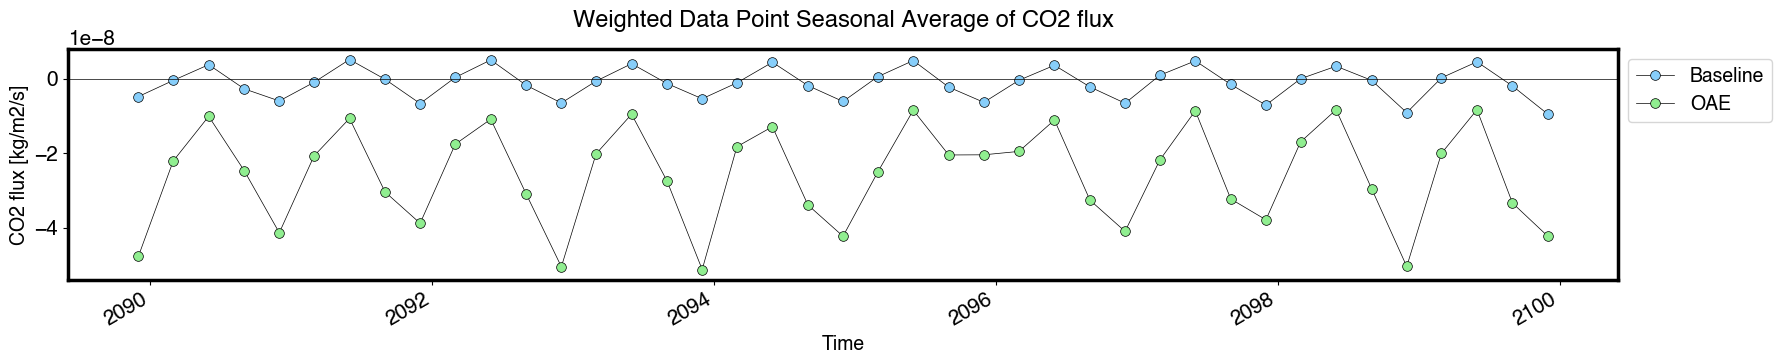

In [23]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
co2flux_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of CO2 flux", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 flux [kg/m2/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted Data Point Seasonal Average of CO2 flux (seasons displayed)

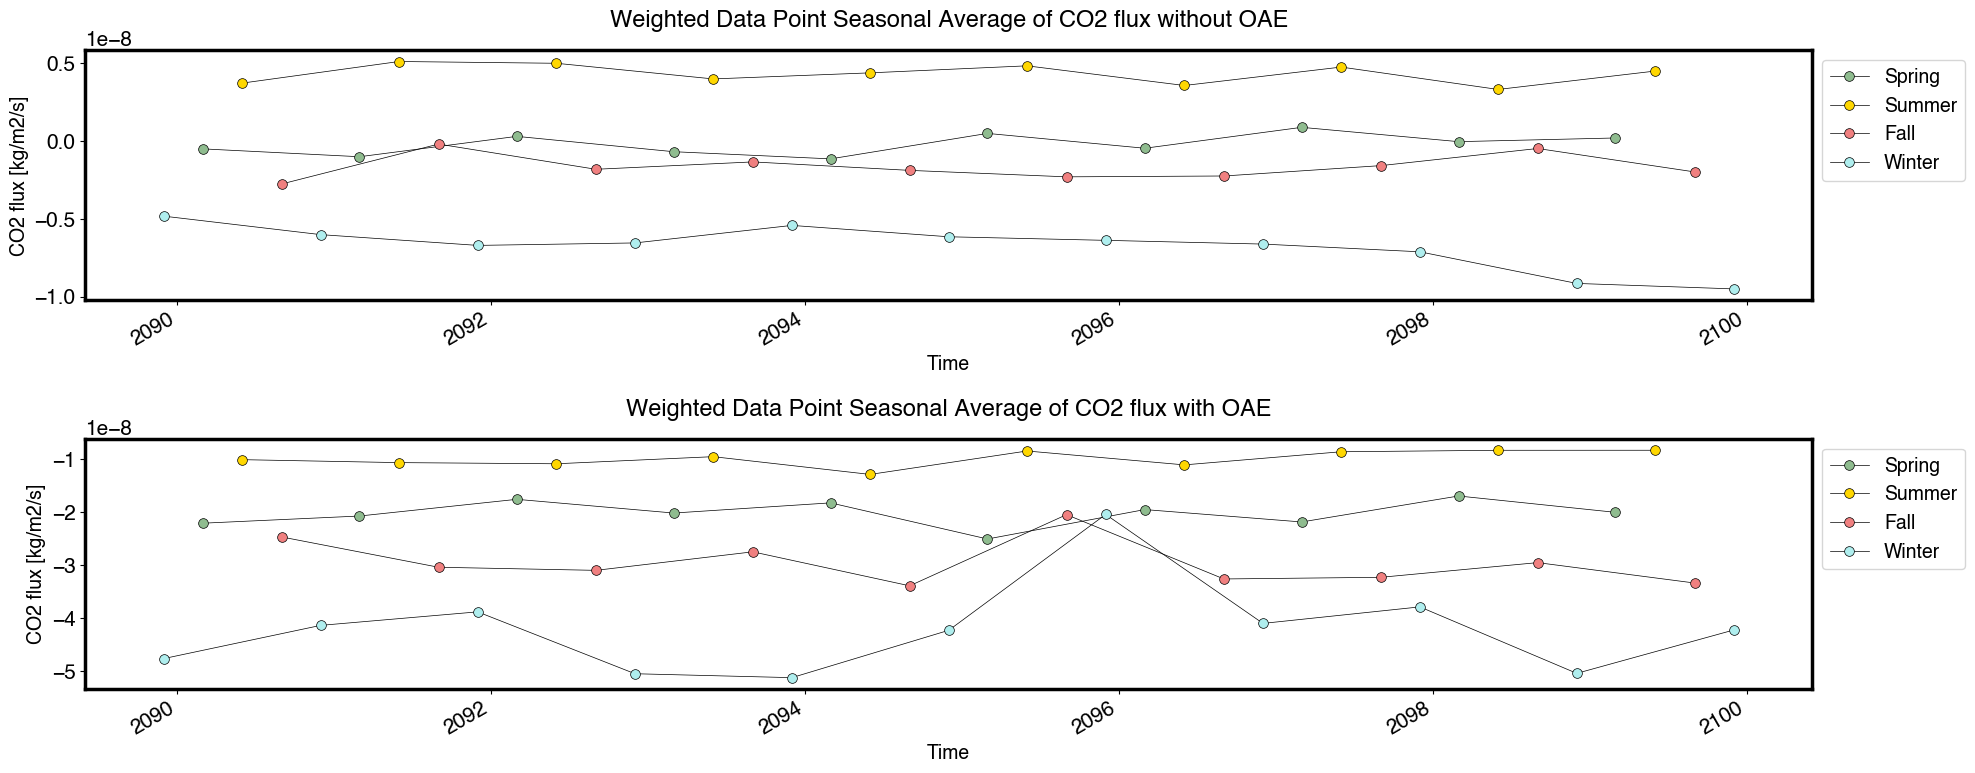

In [24]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in co2flux_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of CO2 flux without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)

for month, arr in co2flux_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of CO2 flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted Data Point Seasonal Average of of CO2 flux without OAE (seasons displayed)

In [25]:
co2flux_weighted_baseline = co2flux_weighted_season_baseline.to_dataframe('co2flux_cpl')
co2flux_weighted_baseline['Month'] = pd.DatetimeIndex(co2flux_weighted_baseline.index).month

In [26]:
conditions = [
    (co2flux_weighted_baseline['Month'] == 3),
    (co2flux_weighted_baseline['Month'] == 6),
    (co2flux_weighted_baseline['Month'] == 9),
    (co2flux_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_baseline['Month'] = np.select(conditions, values)

In [27]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

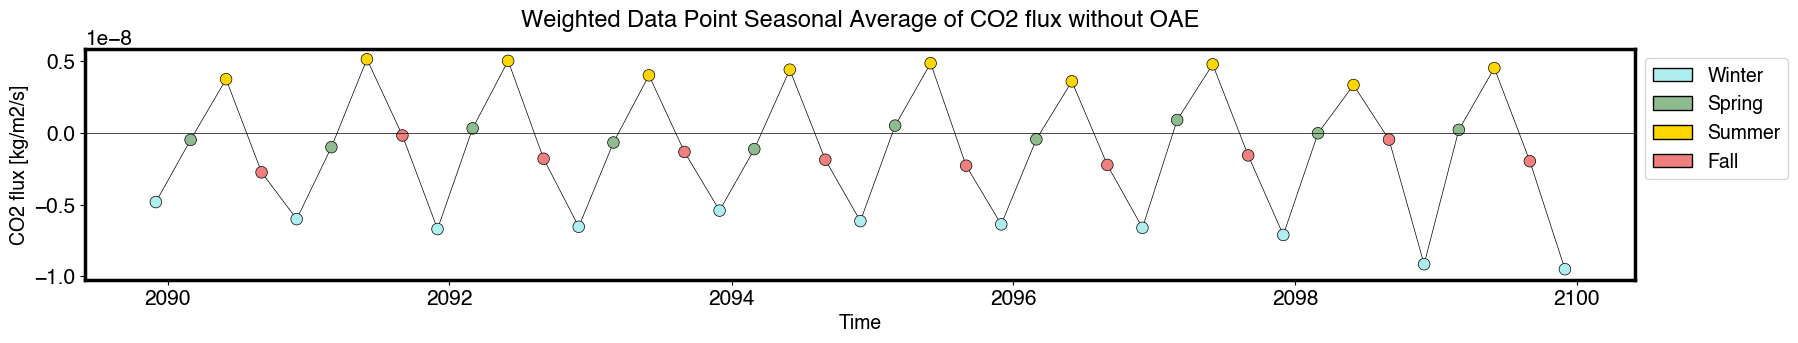

In [28]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of CO2 flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### Weighted Data Point Seasonal Average of CO2 flux with OAE (seasons displayed)

In [29]:
co2flux_weighted_oae = co2flux_weighted_season_oae.to_dataframe('co2flux_cpl')
co2flux_weighted_oae['Month'] = pd.DatetimeIndex(co2flux_weighted_oae.index).month

In [30]:
conditions = [
    (co2flux_weighted_oae['Month'] == 3),
    (co2flux_weighted_oae['Month'] == 6),
    (co2flux_weighted_oae['Month'] == 9),
    (co2flux_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_oae['Month'] = np.select(conditions, values)

In [31]:
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

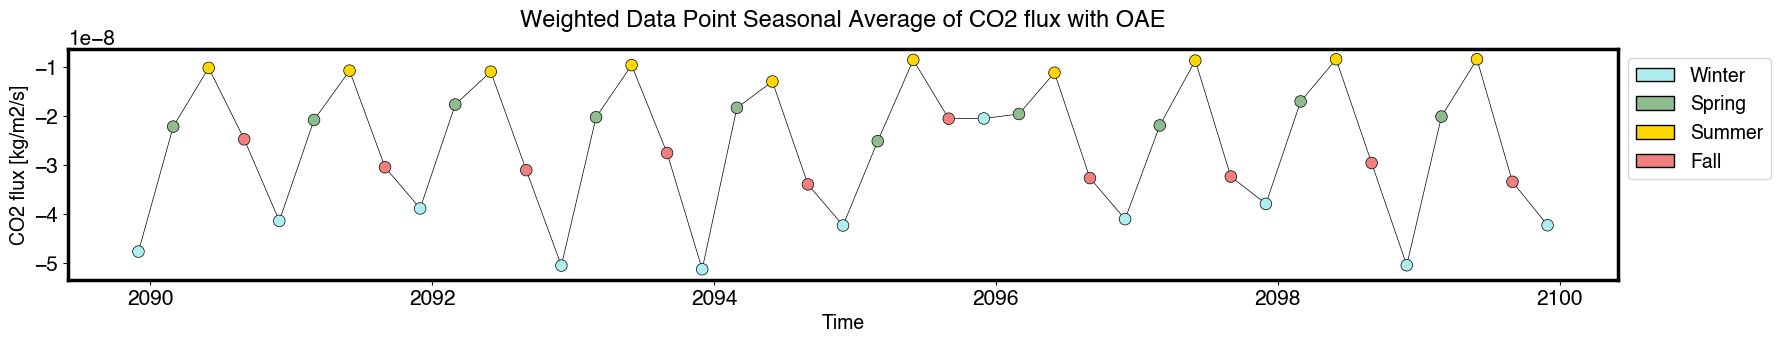

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of CO2 flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of CO2 flux (seasons displayed)

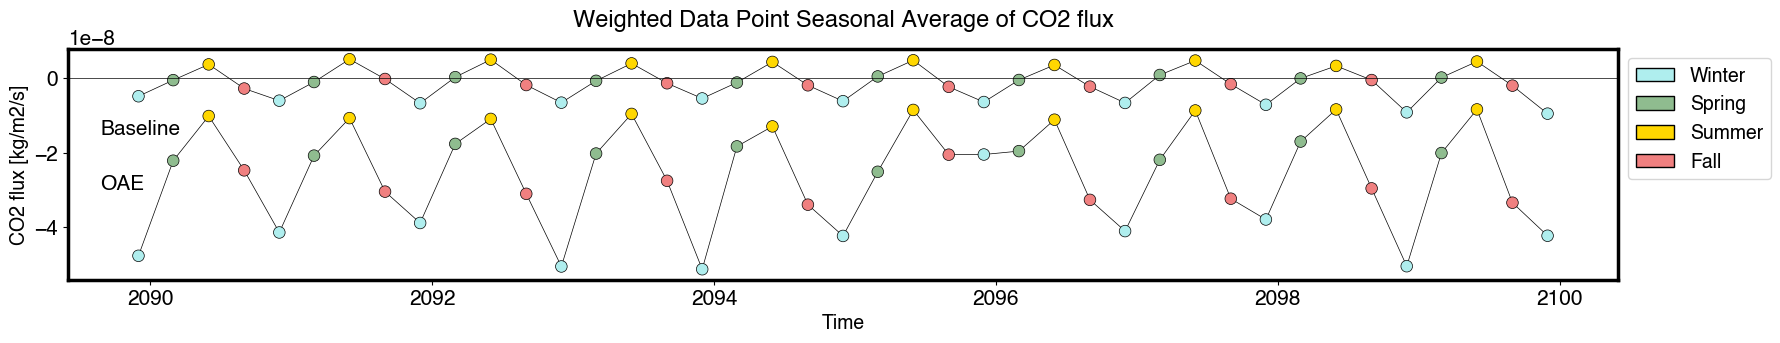

In [33]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43700, -0.000000015, s='Baseline')
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.co2flux_cpl, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, -0.00000003, s='OAE')
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.co2flux_cpl, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of CO2 flux", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/CO2flux/figs/DPCO2flx_seasonal_mean.png')

pass

### Data Point Monthly Average of CO2 flux without OAE

In [34]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

co2flux_baseline_month = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [35]:
co2flux_month_summary_baseline = co2flux_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_baseline = co2flux_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
co2flux_monthly_mean_baseline = co2flux_month_mean_all_years_baseline.mean(["y", "x"])

In [36]:
co2flux_oae_month = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [37]:
co2flux_month_summary_oae = co2flux_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_oae = co2flux_oae_month.resample(time_counter='M').mean(keep_attrs=True)
co2flux_monthly_mean_oae = co2flux_month_mean_all_years_oae.mean(["y", "x"])

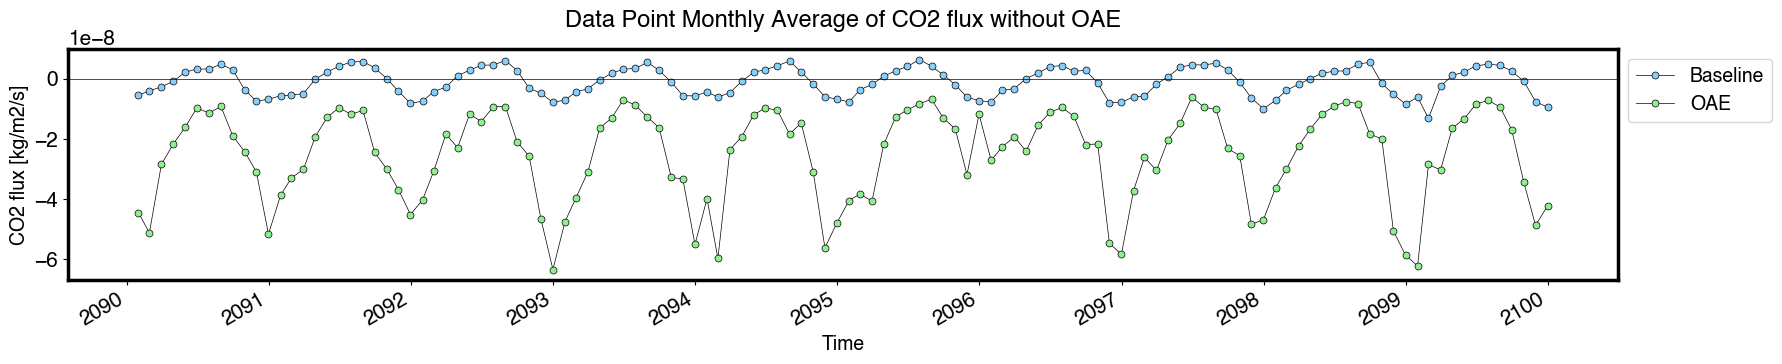

In [38]:
f, ax = plt.subplots(figsize=(20, 3))

co2flux_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of CO2 flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 flux [kg/m2/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Data Point Monthly Average of CO2 flux without OAE (months displayed)

In [39]:
co2flux_baseline_monthly = co2flux_monthly_mean_baseline.to_dataframe('co2flux_cpl')
co2flux_baseline_monthly['Month'] = pd.DatetimeIndex(co2flux_baseline_monthly.index).month

In [40]:
conditions = [
    (co2flux_baseline_monthly['Month'] == 1),
    (co2flux_baseline_monthly['Month'] == 2),
    (co2flux_baseline_monthly['Month'] == 3),
    (co2flux_baseline_monthly['Month'] == 4),
    (co2flux_baseline_monthly['Month'] == 5),
    (co2flux_baseline_monthly['Month'] == 6),
    (co2flux_baseline_monthly['Month'] == 7),
    (co2flux_baseline_monthly['Month'] == 8),
    (co2flux_baseline_monthly['Month'] == 9),
    (co2flux_baseline_monthly['Month'] == 10),
    (co2flux_baseline_monthly['Month'] == 11),
    (co2flux_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_baseline_monthly['Month'] = np.select(conditions, values)

In [41]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

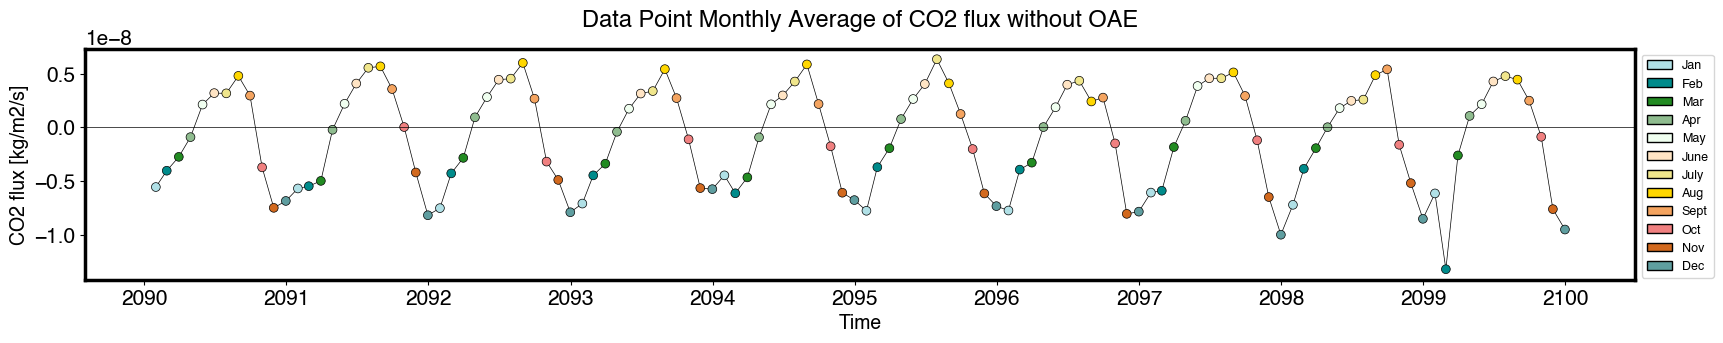

In [42]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Data Point Monthly Average of CO2 flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### Data Point Monthly Average of CO2 flux with OAE (months displayed)

In [43]:
co2flux_oae_monthly = co2flux_monthly_mean_oae.to_dataframe('co2flux_cpl')
co2flux_oae_monthly['Month'] = pd.DatetimeIndex(co2flux_oae_monthly.index).month

In [44]:
conditions = [
    (co2flux_oae_monthly['Month'] == 1),
    (co2flux_oae_monthly['Month'] == 2),
    (co2flux_oae_monthly['Month'] == 3),
    (co2flux_oae_monthly['Month'] == 4),
    (co2flux_oae_monthly['Month'] == 5),
    (co2flux_oae_monthly['Month'] == 6),
    (co2flux_oae_monthly['Month'] == 7),
    (co2flux_oae_monthly['Month'] == 8),
    (co2flux_oae_monthly['Month'] == 9),
    (co2flux_oae_monthly['Month'] == 10),
    (co2flux_oae_monthly['Month'] == 11),
    (co2flux_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_oae_monthly['Month'] = np.select(conditions, values)

In [45]:
colors = dict(zip(co2flux_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

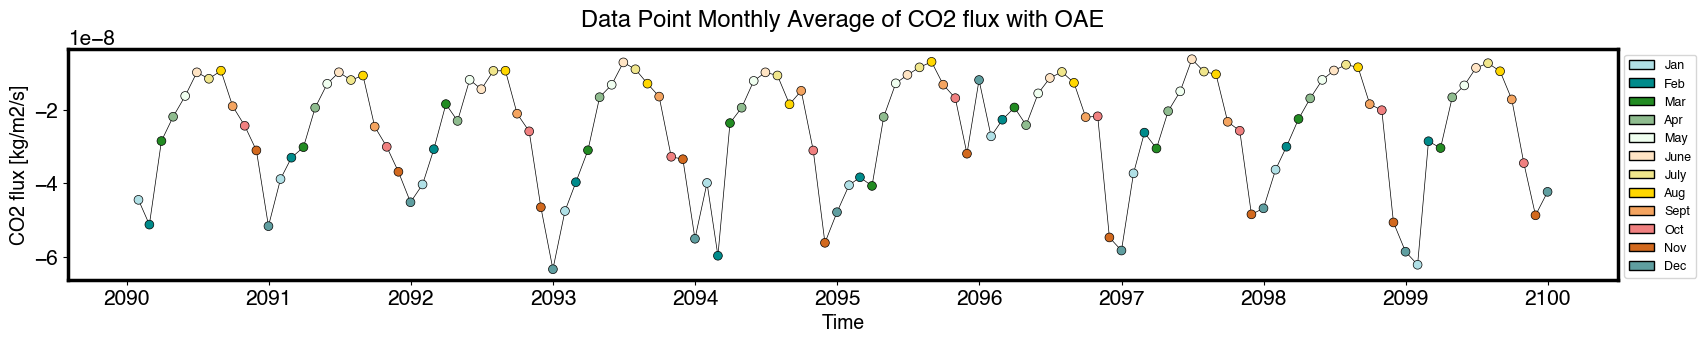

In [46]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Data Point Monthly Average of CO2 flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of CO2 flux (months displayed)

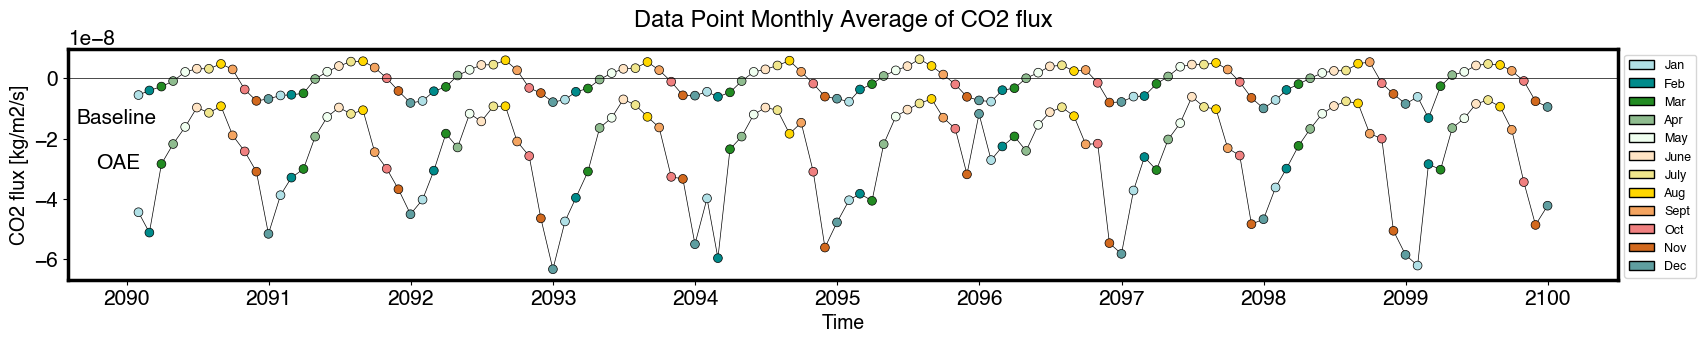

In [47]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, -0.000000015, s='Baseline')
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43750, -0.00000003, s='OAE')
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)
ax.set_title("Data Point Monthly Average of CO2 flux", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/CO2flux/figs/DPCO2flx_monthly_mean.png')

pass

### Δ CO2 flux between Baseline and OAE (months displayed)

In [48]:
delta_co2flux = co2flux_baseline_monthly.co2flux_cpl - co2flux_oae_monthly.co2flux_cpl

In [49]:
delta_co2flux = delta_co2flux.to_xarray()

In [50]:
delta_co2flux = delta_co2flux.to_dataframe('co2flux_cpl')
delta_co2flux['Month'] = pd.DatetimeIndex(delta_co2flux.index).month

In [51]:
conditions = [
    (delta_co2flux['Month'] == 1),
    (delta_co2flux['Month'] == 2),
    (delta_co2flux['Month'] == 3),
    (delta_co2flux['Month'] == 4),
    (delta_co2flux['Month'] == 5),
    (delta_co2flux['Month'] == 6),
    (delta_co2flux['Month'] == 7),
    (delta_co2flux['Month'] == 8),
    (delta_co2flux['Month'] == 9),
    (delta_co2flux['Month'] == 10),
    (delta_co2flux['Month'] == 11),
    (delta_co2flux['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_co2flux['Month'] = np.select(conditions, values)

In [52]:
colors = dict(zip(delta_co2flux.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

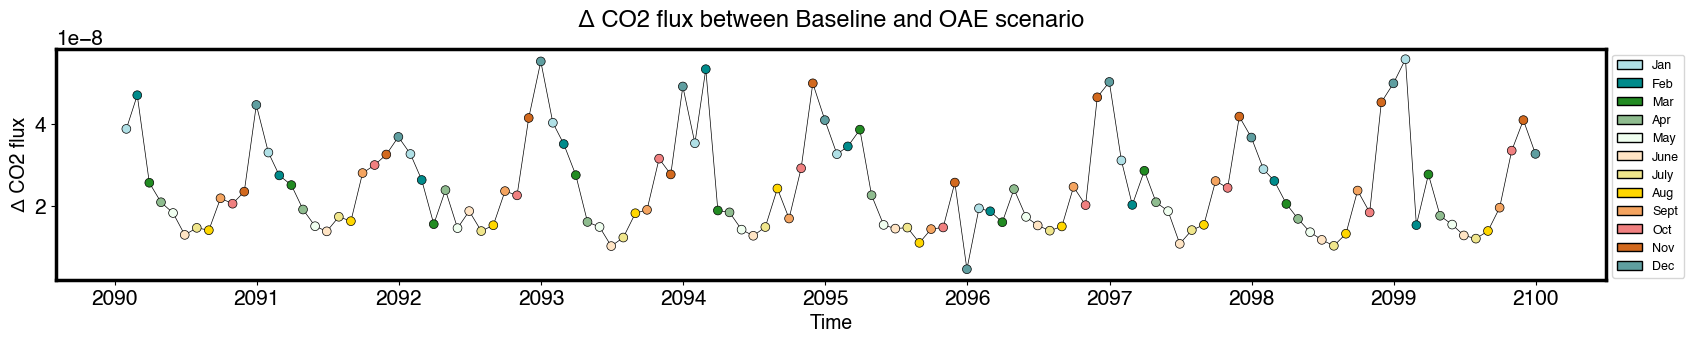

In [53]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_co2flux.index, delta_co2flux.co2flux_cpl, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_co2flux.index, delta_co2flux.co2flux_cpl, color=delta_co2flux.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ CO2 flux', fontsize=14)
ax.set_title("Δ CO2 flux between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/CO2flux/figs/DPCO2flux_Δ_monthly_mean.png')

pass

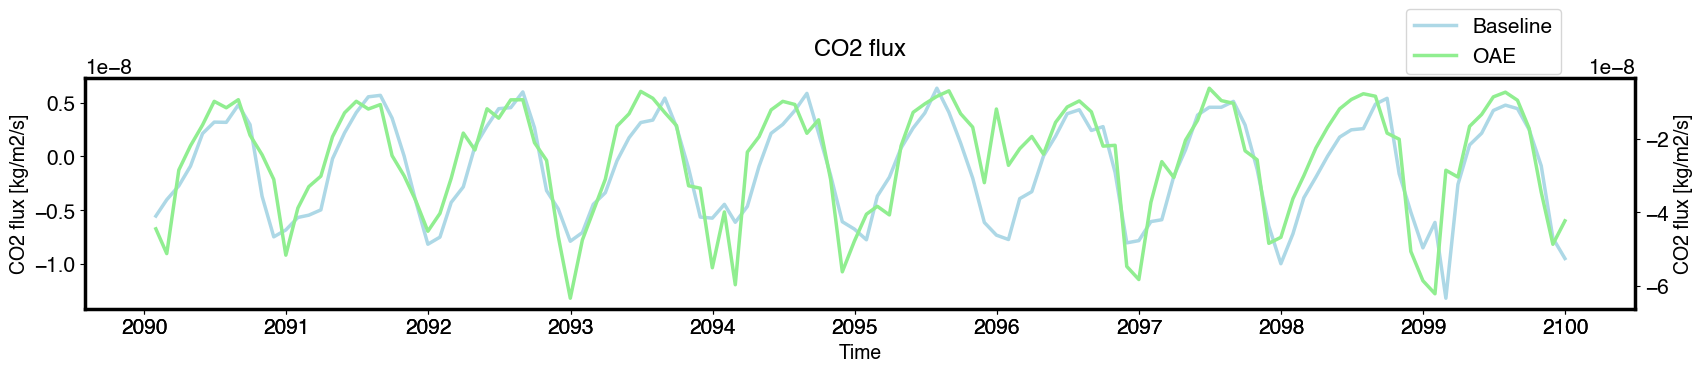

In [54]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_baseline_monthly.index, co2flux_baseline_monthly.co2flux_cpl, linewidth=2.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14)

ax2.plot(co2flux_oae_monthly.index, co2flux_oae_monthly.co2flux_cpl, linewidth=2.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [kg/m2/s]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('CO2 flux', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.78, 1), loc='center left')
plt.show()